# Data Preprocessing : finding feature importance from correlation 

## 202STG01 고유정 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
df = pd.read_csv("C:/Users/yjk9/Desktop/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [12]:
df['class']=df['class'].map({'p':0,'e':1})
x = df.drop('class', axis=1)
y = df['class']

In [13]:
x = pd.get_dummies(x,columns=x.columns ,drop_first=True)

In [14]:
x.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
corr = []
for i in range(x.shape[1]):
    c = np.corrcoef(x.iloc[:,i],y)
    corr.append(abs(c[0][1]))

In [16]:
corr_data = pd.DataFrame({'correlation': corr}, index=x.columns)
corr_data

,correlation
cap-shape_c,0.023007
cap-shape_f,0.018526
cap-shape_k,0.163565
cap-shape_s,0.060664
cap-shape_x,0.026886
...,...
habitat_l,0.155150
habitat_m,0.138627
habitat_p,0.323346
habitat_u,0.112078


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94]),
 <a list of 95 Text xticklabel objects>)

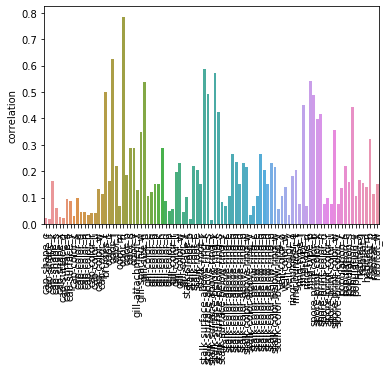

In [17]:
sns.barplot(x=corr_data.index, y = corr_data['correlation'])
plt.xticks(rotation=90)

In [18]:
corr_data = corr_data.sort_values(by = 'correlation', ascending=False)

In [22]:
corr_imp = corr_data[corr_data['correlation'] >= 0.4]
corr_imp

,correlation
odor_n,0.785557
odor_f,0.623842
stalk-surface-above-ring_k,0.587658
stalk-surface-below-ring_k,0.573524
ring-type_p,0.540469
gill-size_n,0.540024
bruises_t,0.501530
stalk-surface-above-ring_s,0.491314
spore-print-color_h,0.490229
ring-type_l,0.451619


In [20]:
corr_X = x[corr_imp.index]
corr_X

,odor_n,odor_f,stalk-surface-above-ring_k,stalk-surface-below-ring_k,ring-type_p,gill-size_n,bruises_t
0,0,0,0,0,1,1,1
1,0,0,0,0,1,0,1
2,0,0,0,0,1,0,1
3,0,0,0,0,1,1,1
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
8119,1,0,0,0,1,0,0
8120,1,0,0,0,1,0,0
8121,1,0,0,0,1,0,0
8122,0,0,0,1,0,1,0
